In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

train, test = train_test_split(data, test_size=0.2, random_state=10)
train_y = train.pop('charges')
test_y = test.pop('charges')

def create_model(learning_rate, num_hidden_layers, num_neurons, activation, dropout_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(num_neurons, activation=activation, input_shape=[len(train.keys())]))

    model.add(tf.keras.layers.Dropout(dropout_rate))

    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='mae',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

def evaluate_mae_model(model, epochs, batch_size, exp_history=False):
    history = model.fit(train, train_y, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    metrics = model.evaluate(test, test_y, verbose=0)
    mae = metrics[1]

    if(exp_history):
      return history

    return mae

def plot_loss(history):
    train_loss = history.history['mae']
    val_loss = history.history['val_mae']

    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, 'b', label='Training MAE')
    plt.plot(epochs, val_loss, 'r', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

**Перебір**

In [ ]:
best_mae = float('inf')
best_params = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    for num_hidden_layers in range(1, 4):
        for num_neurons in [32, 64, 128]:
            for activation in ['relu', 'tanh']:
                for dropout_rate in [0.0, 0.1, 0.2, 0.5]:
                    for epoch_size in [10, 50, 100]:
                        for batch_size in [12, 24, 48]:
                            model = create_model(learning_rate, num_hidden_layers, num_neurons, activation, dropout_rate)
                            mae = evaluate_mae_model(model=model, epochs=epoch_size, batch_size=batch_size)

                            if mae < best_mae:
                                best_mae = mae
                                best_params = {'learning_rate': learning_rate,
                                                'num_hidden_layers': num_hidden_layers,
                                                'num_neurons': num_neurons,
                                                'activation': activation,
                                                'dropout_rate': dropout_rate,
                                                'epochs': epoch_size,
                                                'batch_size': batch_size}


print(f'Best MAE: {best_mae} with parameters: {best_params}')

Best MAE: 1639.3251953125 with parameters: {'learning_rate': 0.01, 'num_hidden_layers': 3, 'num_neurons': 128, 'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'batch_size': 24}


**Random Search**

In [ ]:
from sklearn.model_selection import ParameterSampler
import numpy as np

param_distribs = {
    "learning_rate": [0.01, 0.001, 0.0001],
    "num_hidden_layers": [1, 2, 3, 4, 5],
    "num_neurons": [64, 128, 256],
    "activation": ['relu', 'tanh', 'sigmoid'],
    "dropout_rate": [0.0, 0.1, 0.2, 0.3, 0.5],
    "epochs": np.arange(50, 150),
    "batch_size": np.arange(10, 100)
}

param_list = list(ParameterSampler(param_distribs, n_iter=30))

best_score = np.inf
best_params = None

for params in param_list:
    model = create_model(params['learning_rate'],
                         params['num_hidden_layers'],
                         params['num_neurons'],
                         params['activation'],
                         params['dropout_rate'])

    mae = evaluate_mae_model(model, params['epochs'], params['batch_size'])

    if mae < best_score:
        best_score = mae
        best_params = params

print(f'Best MAE: {best_score} with parameters: {best_params}')

{'num_neurons': 128, 'num_hidden_layers': 2, 'learning_rate': 0.01, 'epochs': 106, 'dropout_rate': 0.2, 'batch_size': 20, 'activation': 'relu'}
mae= 2235.56005859375


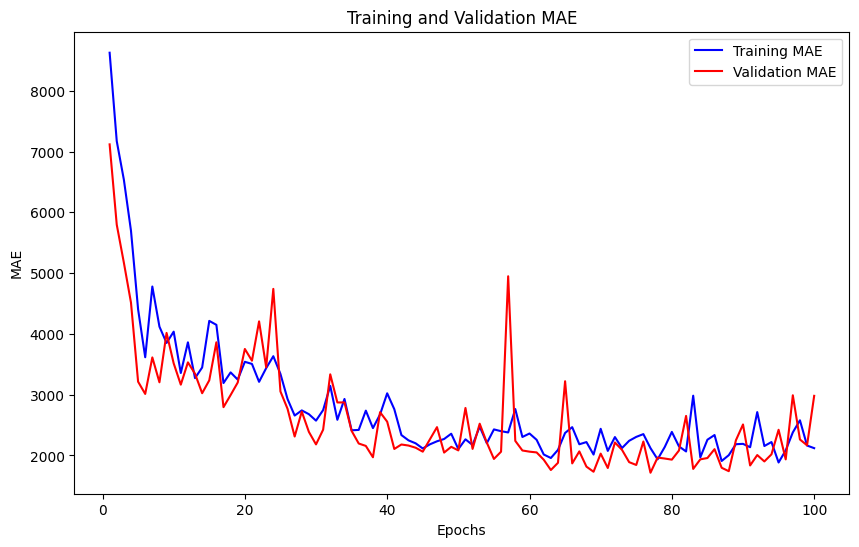

mae: 2120.36865234375


In [ ]:
model = create_model(learning_rate=0.001, num_hidden_layers=5, num_neurons=128, activation='relu', dropout_rate=0.0)
history = evaluate_mae_model(model=model, epochs=100, batch_size=20, exp_history=True)
plot_loss(history)

train_mae = history.history['mae']
final_train_mae = train_mae[-1]

print('mae:', final_train_mae)

# Новый раздел